In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:/data science/data analysis/netflix/mymoviedb.csv",lineterminator='\n')
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [3]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


**changing data type for required coloums

In [4]:
df['Release_Year']=df['Release_Date'].dt.year
df['Release_Year']

0       2021
1       2022
2       2022
3       2021
4       2021
        ... 
9822    1973
9823    2020
9824    2016
9825    2021
9826    1984
Name: Release_Year, Length: 9827, dtype: int64

**Removing Unwanted coloums from data**

In [5]:
cols=['Overview','Original_Language','Poster_Url']
df.drop(cols, axis=1,inplace=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021


In [6]:
def catigorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges,labels=labels, duplicates='drop')
    return df

In [7]:
labels=['not popular','below_avg','average','popular']

In [8]:
catigorize_col(df,'Vote_Average',labels)
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021


In [9]:
df['Vote_Average'].value_counts()

not popular    2467
popular        2450
average        2412
below_avg      2398
Name: Vote_Average, dtype: int64

In [10]:
df['Genre'] = df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022


In [11]:
unique_counts=df.nunique().reset_index()
unique_counts.columns=['columns','unique_counts']
print(unique_counts)


        columns  unique_counts
0  Release_Date           5893
1         Title           9513
2    Popularity           8160
3    Vote_Count           3266
4  Vote_Average              4
5         Genre             19
6  Release_Year            102


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  25793 non-null  datetime64[ns]
 1   Title         25793 non-null  object        
 2   Popularity    25793 non-null  float64       
 3   Vote_Count    25793 non-null  int64         
 4   Vote_Average  25552 non-null  category      
 5   Genre         25793 non-null  object        
 6   Release_Year  25793 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.2+ MB


**DATA VISUALIZATION**

**QUESTION :1 ** What is the most frequent genre of movies released on Netflix?


In [13]:
sns.set_style('darkgrid')


In [14]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

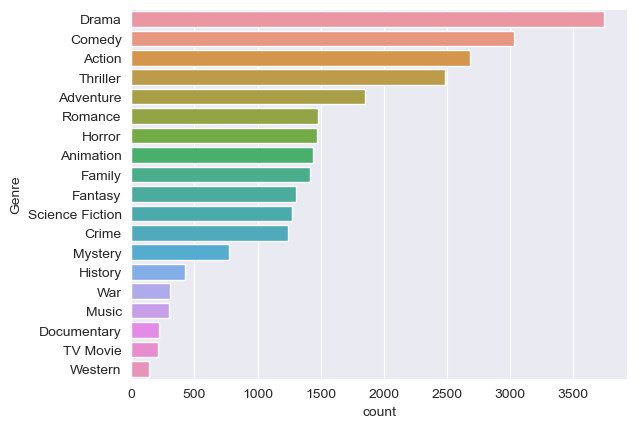

In [15]:
sns.countplot(y='Genre',data=df,order=df['Genre'].value_counts().index)
plt.show()


In [16]:
yea20=df[df['Release_Date'].dt.year==2022]
yea20.head()




,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022
5,2022-03-01,The Batman,3827.658,1151,popular,Thriller,2022
6,2022-02-25,No Exit,2618.087,122,below_avg,Thriller,2022
15,2022-01-07,The Commando,1750.484,33,average,Action,2022


**QUESTION :2** Which has highest votes in vote avg column?



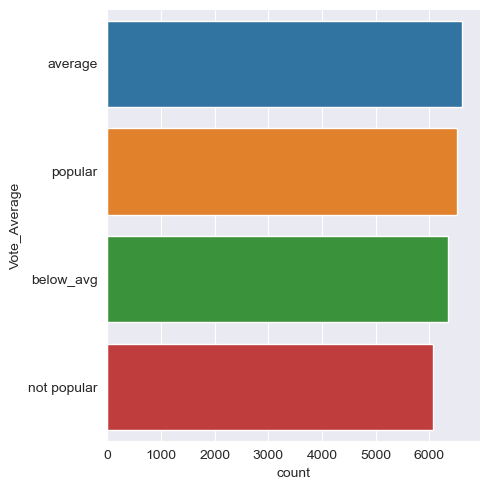

In [17]:

sns.catplot(y='Vote_Average',data=df,order=df['Vote_Average'].value_counts().index,kind='count')
plt.show()


**QUESTION : 3** What movie got the highest popularity? what's its genre?


In [18]:
df[df['Popularity'] == df['Popularity'].max()]
df.head(3)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021


**QUESTION 4** What movie got the lowest popularity? what's its genre?


In [19]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
25787,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Music,2021
25788,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama,2021
25789,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History,2021
25790,1984-09-23,Threads,13.354,186,popular,War,1984
25791,1984-09-23,Threads,13.354,186,popular,Drama,1984
25792,1984-09-23,Threads,13.354,186,popular,Science Fiction,1984


**QUESTION:5** Which year has the most filmmed movies?


In [20]:
year_counts=df['Release_Year'].value_counts()
qw=year_counts.idxmax()
we=year_counts.max()


print(f"this maximum movie released in {qw} and this count is {we}")


this maximum movie released in 2021 and this count is 1638


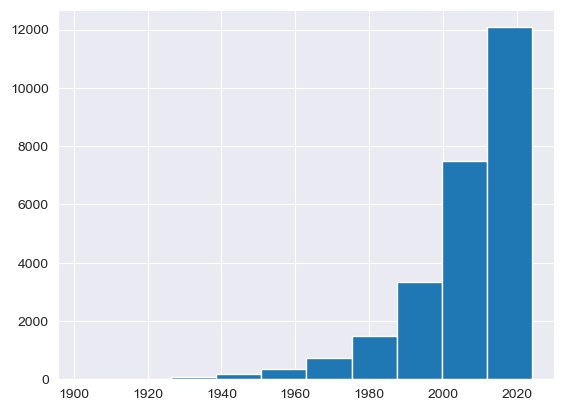

In [21]:
df['Release_Year'].hist()
plt.show()
